In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lib.utils import load_dataset, plot_image
from lib.network import NeuralNetworkClassifier

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [2]:
# Load data
X_train_orig, y_train, X_test_orig, y_test, classes = load_dataset()

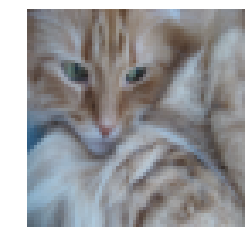

In [3]:
plot_image(X_train_orig, y_train, 2)

In [4]:
n_samples_train = X_train_orig.shape[0]
n_samples_test = X_test_orig.shape[0]
X_train_flattern = X_train_orig.reshape(n_samples_train, -1)
X_test_flattern = X_test_orig.reshape(n_samples_test, -1)

In [5]:
X_train = X_train_flattern / 255.
X_test = X_test_flattern / 255.
X_train.shape

(209, 12288)

In [6]:
y_train.shape

(209,)

In [7]:
layer_dims = [12288, 20, 1]

In [8]:
nn = NeuralNetworkClassifier(layer_dims=layer_dims, max_iter=2500, learning_rate=0.075)

In [9]:
nn.fit(X_train, y_train)

/Users/yang/Code/DeepLearning/n_layer/lib/network.py:169: RuntimeWarning: divide by zero encountered in log
  np.dot(y, np.log(AL.T)) + np.dot(1 - y, np.log(1 - AL.T))
/Users/yang/Code/DeepLearning/n_layer/lib/network.py:196: RuntimeWarning: invalid value encountered in true_divide
  dAL = - (np.divide(y, AL) - np.divide(1 - y, 1 - AL))
/Users/yang/Code/DeepLearning/n_layer/lib/propagation.py:149: RuntimeWarning: invalid value encountered in maximum
  A = np.maximum(0, Z)


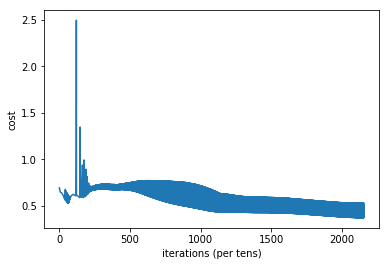

In [10]:
plt.plot(nn.costs)
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.show()

In [11]:
for i, cost in enumerate(nn.costs):
    if i % 100 == 0:
        print(cost)

0.6932039417691713
0.6199331704645253
0.6333976070304057
0.6784556354643547
0.6703501000000218
0.6668740505396495
0.6220434438964876
0.5680384540073198
0.5250396259071785
0.49443321384428596
0.46501713922634297
0.4379992436175216
0.43436575997175103
0.4308733023710842
0.4271603542109213
0.4262845129932073
0.42171968784303515
0.4137485954214949
0.4030728240741675
0.3914893595437837
0.38065949118263154
0.3728016639568389
nan
nan
nan


In [12]:
accuracy = nn.get_accuracy(X_test, y_test)
accuracy

0.0